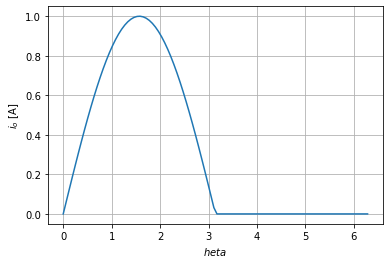

a0 =0.32
a1 =0.50
a2 =0.22
a3 =0.00
a4 =0.04
a5 =0.00
a6 =0.02


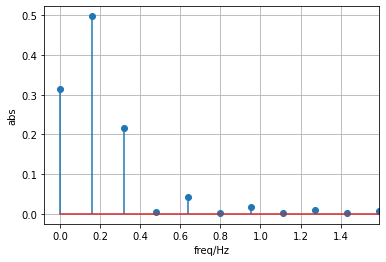

3.1510034249551144 2.487330868028244 0.789377392715362


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Estas funciones calculas las componentes de la serie de Fourier para una senal dada
# A cada función se pasa como argumento la señal x y el numero de armonico a calcular.
# El muestreo se define por la cantidad de muestras dentro del periodo de la señal x.

# Serie trigonometrica
def DFTT(x, k):
    N = len(x)
    a = 2/N*sum([s*np.cos(2*np.pi*i/N*k) for i,s in enumerate(x)])
    b = 2/N*sum([s*np.sin(2*np.pi*i/N*k) for i,s in enumerate(x)])
    if k == 0 : a = a /2.
    return a,b

# defino el sampleo
n   = 100
# vector de tiempo 
th  = 2*np.pi*np.linspace(0, 1, num=n)

# frecuancia de la señal
fm   = 1/(2*np.pi) #rad
# Amplitud
Ac   = 1 

# Muestreo: tiempo máximo del analisis (periodo de la ventana)
T = 1/fm 

# Pulso 
Sm   = Ac*np.sin(th)  

thc  = 1*np.pi
# Señal Pulso de coseno
Sp   = np.array([Sm[i] if t <= thc  else 0  for i,t in enumerate(th)]) 

plt.plot(th, Sp)
plt.ylabel('$i_{o}$ [A]')
plt.xlabel('${\theta}$')
#plt.ylim(0, Ic*1.5)
plt.grid()
plt.show()

# Serie de Fourier Trigonometrica
# la separacion de las deltas = 1/T  
freq = np.arange(0,n*fm/2,1/T)

a = [DFTT(Sp,m)[0] for m in range(len(freq))]
b = [DFTT(Sp,m)[1] for m in range(len(freq))]

ab = [(a[i]+1j*b[i]) for i in range(len(a))] # debido al defasaje se emplea la variacion de j
for i in range(7):
    print('a{:1} ={:.2f}'.format(i, np.abs(ab)[i]) )


plt.stem( freq, np.abs(ab))
plt.xlim([-0.5*fm,fm*10])
plt.ylabel('abs')
plt.xlabel('freq/Hz')
plt.grid()
plt.show()

VDC = 10
PDC = VDC*abs(ab[0])

PL  = VDC*abs(ab[1])/2

rendimiento = PL/PDC

print(abs(PDC),abs(PL),rendimiento)